
==\# Logic Based FizzBuzz Function [Software 1.0]

In [13]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz' 
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [14]:
def createInputCSV(start,end,filename):
    
    # Why list in Python? 
    # We are using List data structure beacuse it has many methods like append which we need 
    inputData   = [] 
    outputData  = []
    
    # Why do we need training Data?
    # We need training data because when the computer sees similar data it will know what to do
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels.
    #Can be thought of as a dict-like container for Series objects. The primary pandas data structure.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing the dataset to csv file
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [15]:
def processData(dataset):
    
    # Why do we have to process? 
    #After you have selected the data, you need to consider how you are going to use the data. This preprocessing step is about getting the selected data into a form that we can work.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [16]:
 def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        #training data maximum value is 1000  needs 10 bits to represent in binary
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [17]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            #labelling Fizzbuzz category as 3
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            #labelling Fizz category as 1
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # labelling buzz category as 2
            processedLabel.append([2])
        else:
            # labelling other category as 0
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard,ModelCheckpoint

import numpy as np

input_size = 10 #training data maximum value is 1000 needs 10 bits to represent in binary
drop_out = 0.2  
first_dense_layer_nodes  = 1024
sec_dense_layer_nodes = 512
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    #A model helps to explain a system and to study the effects of different components, and to make predictions about behavior.
    # Why use Dense layer and then activation?
    # Dense layer is just your regular densely-connected NN layer and the activation function need to be applied to an output of dense layer.
    # Why use sequential model with layers?
    #The Sequential model is just a linear stack of layers.


    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # To Prevent Neural Networks from Overfitting
    model.add(Dropout(drop_out))
    
    model.add(Dense(sec_dense_layer_nodes))
    model.add(Activation('relu'))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    #To reduce the influence of extreme values in the data  without removing them from the data s#
    model.summary()
    
    # Why use categorical_crossentropy?
    #Loss function to calculate the amount of inaccuracy
    model.compile(optimizer='adadelta',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [19]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [20]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              11264     
_________________________________________________________________
activation_4 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total para

# <font color = blue>Run Model</font>

In [21]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
#filepath='max.csv'
#checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
#checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 461us/step - loss: 1.2164 - acc: 0.5000 - val_loss: 1.1603 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 174us/step - loss: 1.1612 - acc: 0.5333 - val_loss: 1.1657 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 195us/step - loss: 1.1550 - acc: 0.5333 - val_loss: 1.1518 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 167us/step - loss: 1.1428 - acc: 0.5333 - val_loss: 1.1447 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 171us/step - loss: 1.1505 - acc: 0.5333 - val_loss: 1.1574 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 161us/step - loss: 1.1439 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 192us/step - loss: 1.1409 - acc: 0.5333 - val_loss: 1.1707 - val_acc: 0.

720/720 [==============================] - 0s 174us/step - loss: 0.8615 - acc: 0.6028 - val_loss: 0.9588 - val_acc: 0.6222
Epoch 61/10000
720/720 [==============================] - 0s 193us/step - loss: 0.6926 - acc: 0.7597 - val_loss: 0.8411 - val_acc: 0.7278
Epoch 62/10000
720/720 [==============================] - 0s 170us/step - loss: 0.6130 - acc: 0.8111 - val_loss: 1.2198 - val_acc: 0.4611
Epoch 63/10000
720/720 [==============================] - 0s 174us/step - loss: 0.7141 - acc: 0.7014 - val_loss: 0.8284 - val_acc: 0.6111
Epoch 64/10000
720/720 [==============================] - 0s 157us/step - loss: 0.7701 - acc: 0.6819 - val_loss: 0.9127 - val_acc: 0.5667
Epoch 65/10000
720/720 [==============================] - 0s 174us/step - loss: 0.5983 - acc: 0.7833 - val_loss: 0.9608 - val_acc: 0.6056
Epoch 66/10000
720/720 [==============================] - 0s 195us/step - loss: 0.7448 - acc: 0.6764 - val_loss: 0.8433 - val_acc: 0.6611
Epoch 67/10000
720/720 [=========================

720/720 [==============================] - 0s 191us/step - loss: 0.0910 - acc: 0.9764 - val_loss: 0.3119 - val_acc: 0.9000
Epoch 120/10000
720/720 [==============================] - 0s 171us/step - loss: 0.0866 - acc: 0.9833 - val_loss: 0.3293 - val_acc: 0.8778
Epoch 121/10000
720/720 [==============================] - 0s 156us/step - loss: 0.0806 - acc: 0.9861 - val_loss: 0.2674 - val_acc: 0.9167
Epoch 122/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0766 - acc: 0.9861 - val_loss: 0.4005 - val_acc: 0.8444
Epoch 123/10000
720/720 [==============================] - 0s 163us/step - loss: 0.0725 - acc: 0.9861 - val_loss: 0.2173 - val_acc: 0.9444
Epoch 124/10000
720/720 [==============================] - 0s 174us/step - loss: 0.1075 - acc: 0.9736 - val_loss: 0.2769 - val_acc: 0.9222
Epoch 125/10000
720/720 [==============================] - 0s 188us/step - loss: 0.0930 - acc: 0.9792 - val_loss: 0.3812 - val_acc: 0.8667
Epoch 126/10000
720/720 [==================

Epoch 178/10000
720/720 [==============================] - 0s 152us/step - loss: 0.0336 - acc: 0.9917 - val_loss: 0.2341 - val_acc: 0.9278
Epoch 179/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0302 - acc: 0.9958 - val_loss: 0.2286 - val_acc: 0.9333
Epoch 180/10000
720/720 [==============================] - 0s 158us/step - loss: 0.0327 - acc: 0.9958 - val_loss: 0.2333 - val_acc: 0.9389
Epoch 181/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0259 - acc: 0.9972 - val_loss: 0.2744 - val_acc: 0.9167
Epoch 182/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0232 - acc: 0.9972 - val_loss: 0.2105 - val_acc: 0.9444
Epoch 183/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0306 - acc: 0.9972 - val_loss: 0.2071 - val_acc: 0.9444
Epoch 184/10000
720/720 [==============================] - 0s 181us/step - loss: 0.0311 - acc: 0.9944 - val_loss: 0.2116 - val_acc: 0.9333
Epoch 185/10000
720/720 [==

720/720 [==============================] - 0s 162us/step - loss: 0.0188 - acc: 0.9931 - val_loss: 0.3158 - val_acc: 0.9167
Epoch 237/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0179 - acc: 0.9986 - val_loss: 0.2305 - val_acc: 0.9333
Epoch 238/10000
720/720 [==============================] - 0s 203us/step - loss: 0.0144 - acc: 0.9986 - val_loss: 0.1998 - val_acc: 0.9500
Epoch 239/10000
720/720 [==============================] - 0s 195us/step - loss: 0.0135 - acc: 0.9986 - val_loss: 0.2101 - val_acc: 0.9333
Epoch 240/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0135 - acc: 0.9986 - val_loss: 0.1922 - val_acc: 0.9556
Epoch 241/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0187 - acc: 0.9972 - val_loss: 0.1992 - val_acc: 0.9389
Epoch 242/10000
720/720 [==============================] - 0s 173us/step - loss: 0.0115 - acc: 0.9986 - val_loss: 0.2225 - val_acc: 0.9444
Epoch 243/10000
720/720 [==================

720/720 [==============================] - 0s 174us/step - loss: 0.0084 - acc: 0.9972 - val_loss: 0.2404 - val_acc: 0.9444
Epoch 296/10000
720/720 [==============================] - 0s 152us/step - loss: 0.0157 - acc: 0.9958 - val_loss: 0.2578 - val_acc: 0.9278
Epoch 297/10000
720/720 [==============================] - 0s 182us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.2503 - val_acc: 0.9389
Epoch 298/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0122 - acc: 0.9972 - val_loss: 0.2565 - val_acc: 0.9389
Epoch 299/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.1835 - val_acc: 0.9611
Epoch 300/10000
720/720 [==============================] - 0s 197us/step - loss: 0.0132 - acc: 0.9986 - val_loss: 0.2467 - val_acc: 0.9444
Epoch 301/10000
720/720 [==============================] - 0s 158us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.2327 - val_acc: 0.9500
Epoch 302/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C19B574438>,
      dtype=object)

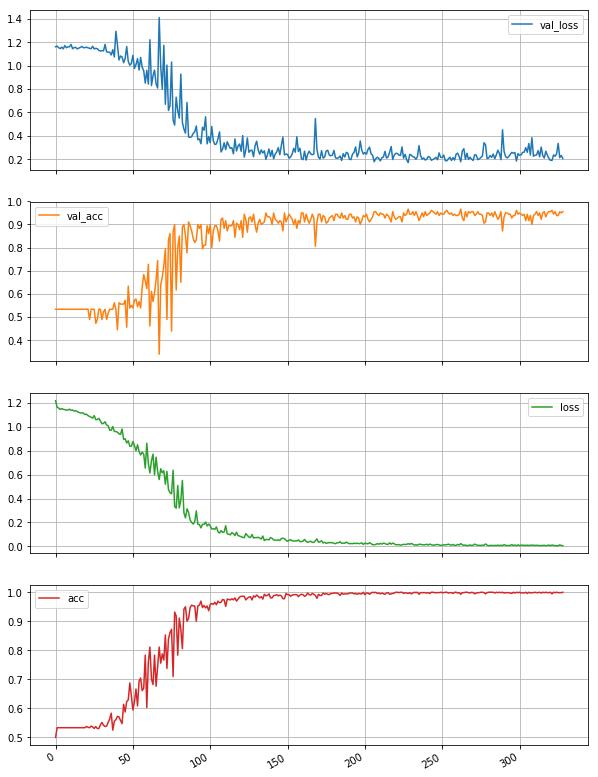

In [22]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [23]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [24]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
     #print(np.array(i))
    y = model.predict(np.array(i).reshape(-1,10))
     #print(np.array(i).reshape(-1,10))
    
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "saivarun")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "XXXXXXXX")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 2  Correct :98
Testing Accuracy: 98.0
